# MDTB data set rsFC validation

Taku Ito
2/7/21

In [58]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nibabel as nib
import scipy.stats as stats

#### Params

In [10]:
datadir = '../../derivatives/postprocessing/'

subIDs=['02','03','04','06','08','09','10','12','14','15','18','20','22','25','27','29','31','17','19','21','24','26','28','30']
runs = ['bold9','bold10']

netassignments = np.loadtxt('/home/ti236/AnalysisTools/ColeAnticevicNetPartition/cortex_parcel_network_assignments.txt')
# need to subtract one to make it compatible for python indices
indsort = np.loadtxt('/home/ti236/AnalysisTools/ColeAnticevicNetPartition/cortex_community_order.txt',dtype=int) - 1 
indsort.shape = (len(indsort),1)



In [21]:
def loadRawParcellatedData(sess,run,datadir='/gpfs/loomis/project/n3/Studies/MurrayLab/taku/multiTaskVAE/qunexMultiTaskVAE/sessions/'):
    """ 
    Load in parcellated data for given session and run
    """
    datafile = datadir + sess + '/images/functional/' + run + '_Atlas.LR.Parcels.32k_fs_LR.ptseries.nii'
    data = nib.load(datafile).get_data()
    return data

#### Load in parcellated data and compute correlation matrix

In [50]:
corrmats = []
for sub in subIDs:
    
    for run in runs:
        
#         try:
#             h5f = h5py.File(datadir + sub + '_b2_rsfMRI_qunex_' + run + '.h5','r')
#             ts = h5f['residuals'][:]
#             h5f.close()
#             mat = np.corrcoef(ts)
#             np.fill_diagonal(mat,0)
#             corrmats.append(mat)
#         except:
#             print('Subject', sub, '| run', run, ' does not exist... skipping')

        try:
            sess = sub + '_b2'
            ts = loadRawParcellatedData(sess,run)
#             mat = np.corrcoef(ts.T)
            np.fill_diagonal(mat,0)
            corrmats.append(mat)
        except:
            print('Subject', sub, '| run', run, ' does not exist... skipping')

        


        
corrmats = np.asarray(corrmats)


<ipython-input-21-110939f05734>:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = nib.load(datafile).get_data()


Subject 04 | run bold9  does not exist... skipping
Subject 04 | run bold10  does not exist... skipping
Subject 09 | run bold9  does not exist... skipping
Subject 09 | run bold10  does not exist... skipping
Subject 15 | run bold9  does not exist... skipping
Subject 15 | run bold10  does not exist... skipping
Subject 17 | run bold9  does not exist... skipping
Subject 17 | run bold10  does not exist... skipping
Subject 19 | run bold9  does not exist... skipping
Subject 19 | run bold10  does not exist... skipping
Subject 21 | run bold9  does not exist... skipping
Subject 21 | run bold10  does not exist... skipping


In [52]:
h5f = h5py.File(datadir + '02_b2_rsfMRI_qunex_' + run + '.h5','r')
ts = h5f['residuals'][:]
h5f.close()
mat = np.corrcoef(ts)

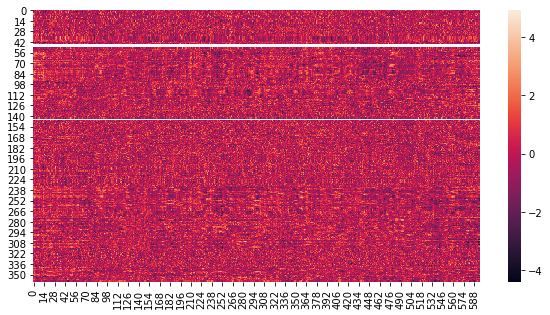

In [59]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(stats.zscore(ts,axis=1))

In [53]:
np.sum(np.isnan(mat))

8496

In [48]:
for i in range(corrmats.shape[0]):
    print(np.sum(np.isnan(corrmats[i])))

6390
8484
0
0
0
0
0
0
0
12618
0
0
0
0
0
0
0
0
0
0
32830
53890
0
0
0
0
0
0
0
0
0
0
0
0
0
0


#### Plot correlation matrix (sorted)

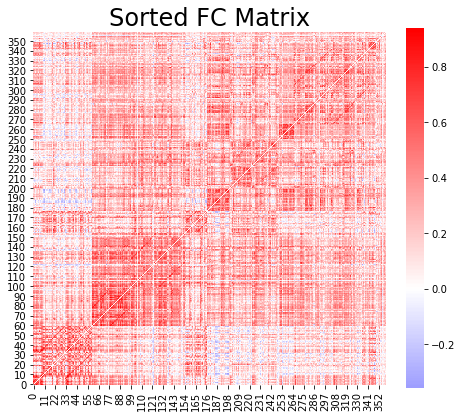

In [51]:
fcmat = np.mean(corrmats,axis=0)
fcmat_sorted = fcmat[indsort,indsort.T]
plt.figure(figsize=(7,7))
ax = sns.heatmap(fcmat_sorted,square=True,center=0,cmap='bwr',cbar_kws={'fraction':0.046})
ax.invert_yaxis()
plt.title('Sorted FC Matrix',fontsize=24)
plt.show()


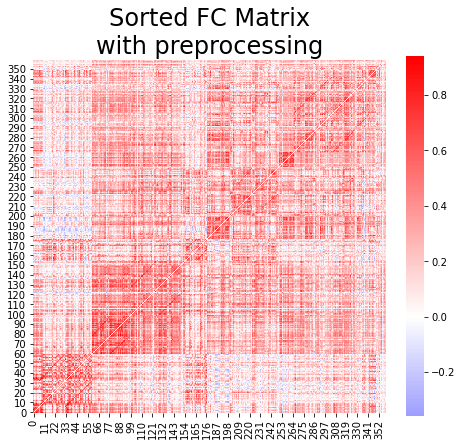

In [44]:
fcmat = np.nanmean(corrmats,axis=0)
fcmat_sorted = fcmat[indsort,indsort.T]
plt.figure(figsize=(7,7))
ax = sns.heatmap(fcmat_sorted,square=True,center=0,cmap='bwr',cbar_kws={'fraction':0.046})
ax.invert_yaxis()
plt.title('Sorted FC Matrix\nwith preprocessing',fontsize=24)
plt.show()
